In [1]:
import os, sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, currentdir) 
sys.path.insert(0, parentdir) 

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
from matplotlib.ticker import MaxNLocator

import numpy as np
import scipy
from scipy.integrate import odeint, DOP853, solve_ivp
from scipy.stats import special_ortho_group
from scipy.linalg import qr
import nolds

import seaborn as sns

sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 1})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# for ti in t:
#     v += 0.5 * dt_msec * (0.04 * v ** 2 + 5 * v + 140 - u + current)
#     v += 0.5 * dt_msec * (0.04 * v ** 2 + 5 * v + 140 - u + current)
#     u += dt_msec * a * (b * v - u)

In [15]:
C_m, R_m = 10,10000
v_rest, v_threshold = -.007 , -0.003
dt_msec = .01/2

T = 20
t = np.arange(0,T,dt_msec)
T_steps = t.shape[0]
v = np.zeros((2,T_steps))
v[0] = v_rest
v[1] = v_rest + 0.0040
I = 0*np.ones(T_steps)/100000.

spikes = np.zeros((2,T_steps))

tau = 95

def disc_lif(T,dt_msec,tau,v_0=0):
    T = 20
    t = np.arange(0,T,dt_msec)
    T_steps = t.shape[0]
    v = np.zeros((2,T_steps))
    v[0] = v_rest + v_0
    v[1] = v_rest + 0.0040
    spikes = np.zeros((2,T_steps))
    for i in range(tau):
        for j in range(2):
            v[j,i+1] = v[j,i] + (I[i] - v[j,i]/R_m)/C_m*dt_msec
            if v[j,i+1] >= v_threshold:
                v[j,i+1] = v_rest
                spikes[j,i+1] = 1

    for i in range(tau,T_steps-1):

        for j in range(2):  
            if v[j,i] >= v_threshold:
                v[j,i] = v_rest
                spikes[j,i] = 1
            v[j,i+1] = v[j,i] + (I[i]- 0*(v[j,i]-v_rest)/R_m)/C_m*dt_msec  + 0*np.random.normal(0,1e-4)
            if np.sum(spikes[j,i-51:i+1])<=0:
                v[j,i+1] += 4*.4*np.mean([spikes[j-1,i-tau-k] for k in range(0,50)])*dt_msec 
    return v, spikes

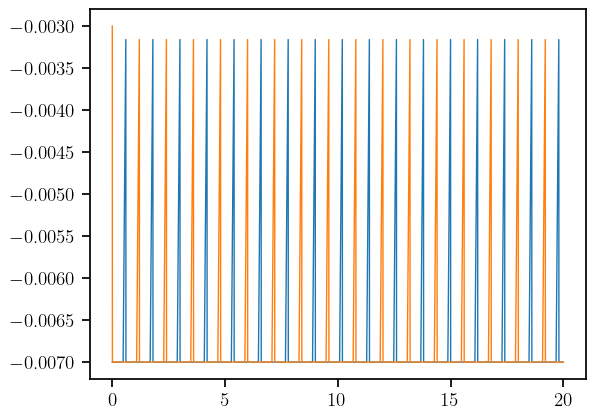

In [16]:
v1, spikes1 = disc_lif(T,dt_msec,tau,v_0=.000)
v2, spikes2 = disc_lif(T,dt_msec,tau,v_0=.0001)


plt.plot(t, v1[0,:])
plt.plot(t, v1[1,:])
# plt.plot(t, spikes[0,:])
# plt.plot(t, spikes[1,:])

In [17]:
#get the period of the circuit
T = np.ediff1d(np.where(spikes2))[-1]
T

240

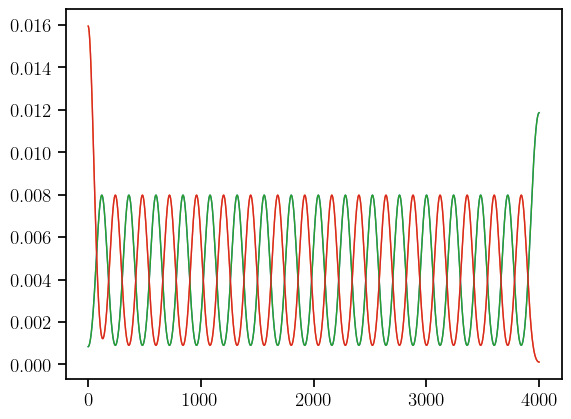

In [18]:
filtered_spikes1 = scipy.ndimage.gaussian_filter1d(spikes1, sigma=50)
filtered_spikes2 = scipy.ndimage.gaussian_filter1d(spikes2, sigma=50)

plt.plot(filtered_spikes1.T)
plt.plot(filtered_spikes2.T)

In [27]:
N_circ = 8

tau_circ = 37# N_circ*tau_circ=T
tau_offset = 0
tau_offset_2 = 0

hd_acts = np.zeros((N_circ, T_steps))

for n in range(N_circ):
    # hd_acts[n,:] = np.multiply(np.roll(filtered_spikes1[0,:], n*tau_circ+tau_offset),np.roll(filtered_spikes2[0,:], tau_offset))
    hd_acts[n,:] = np.exp(np.roll(filtered_spikes1[0,:], n*tau_circ+tau_offset)+np.roll(filtered_spikes2[0,:], tau_offset))

    # hd_acts[n,:] = np.multiply(hd_acts[n,:],np.roll(filtered_spikes1[1,:], n*tau_circ+tau_offset_2))
    # hd_acts[n,:] = np.multiply(hd_acts[n,:],np.roll(filtered_spikes2[1,:], tau_offset_2))
    


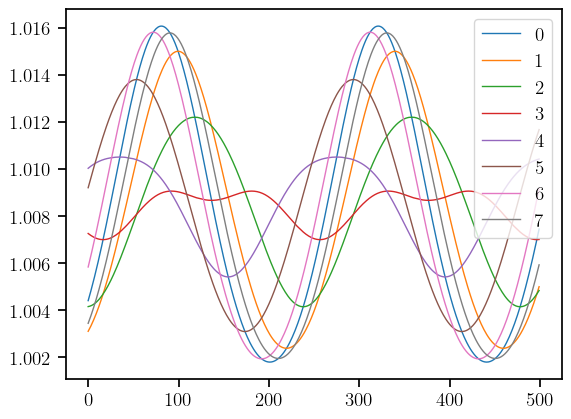

In [28]:
plt.plot(hd_acts[:,1000:1500].T,label=range(N_circ))
plt.legend()

In [527]:
#Oscillator 1 projections onto EP

